In [1]:
import pandas as pd

In [3]:
online_retail = pd.read_excel('Online Retail.xlsx')

In [4]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [5]:
online_retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [7]:
online_retail.StockCode.value_counts().head()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: StockCode, dtype: int64

In [8]:
online_retail[online_retail.StockCode == '85123A'].count()

InvoiceNo      2313
StockCode      2313
Description    2313
Quantity       2313
InvoiceDate    2313
UnitPrice      2313
CustomerID     2077
Country        2313
dtype: int64

### Understanding the data\n",
* We will try to understand what each column means
* InvoiceNo - The bill number, products which are bought together have same invoice number
* StockCode - It's unique product id
* Description - Information about the product
* Quantity - Number of times in a bill that item was purchased
* InvoiceDate - Date in which purchase was done
* UnitPrice - Price of each item
* CustomerId - Unique identifier of customer
* Country - Where the purchase is happening

### Stage 1 : Questions based on this data
    1. How many unique billing was made?
    2. How many total customers are there?
    3. Which day of the week most sale was done?
    4. What is the most popular product?
    5. In which country should you open more stores?

### 1. How many unique billing was made?

In [14]:
#1
online_retail.InvoiceNo.unique().size

25900

### 2. How many total customers are there?

In [16]:
#2
online_retail.CustomerID.unique().size

4373

### 3. Which day of the week most sale was done?

In [24]:
#3
online_retail["week_ofthe_day"] = online_retail.InvoiceDate.map(lambda x: pd.Timestamp(x).day_name())


In [26]:
def f(c):
    return c.UnitPrice * c.Quantity
online_retail['Total_Price'] = online_retail.apply(f , axis=1)

In [29]:
online_retail.groupby(['week_ofthe_day']).Total_Price.sum().sort_values(ascending=False)[:5]

week_ofthe_day
Thursday     2112519.000
Tuesday      1966182.791
Wednesday    1734147.010
Monday       1588609.431
Friday       1540610.811
Name: Total_Price, dtype: float64

### 4. What is the most popular product?

In [32]:
#4
top_selling_product = online_retail.groupby(['StockCode']).Quantity.sum().sort_values(ascending = False)[:5]
top_selling_product

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
Name: Quantity, dtype: int64

In [33]:
top_selling_prods = list(top_selling_product.index)
top_selling_prods

[22197, 84077, '85099B', '85123A', 84879]

In [34]:
for prod in top_selling_prods:
    print(online_retail[online_retail.StockCode == prod].Description.unique())

['SMALL POPCORN HOLDER' 'POPCORN HOLDER']
['WORLD WAR 2 GLIDERS ASSTD DESIGNS']
['JUMBO BAG RED RETROSPOT']
['WHITE HANGING HEART T-LIGHT HOLDER' '?' 'wrongly marked carton 22804'
 'CREAM HANGING HEART T-LIGHT HOLDER']
['ASSORTED COLOUR BIRD ORNAMENT' 'damaged']


### 5. In which country should you open more stores?

In [35]:
#5
online_retail.groupby(['Country']).Total_Price.sum().sort_values(ascending=False)[:5]

Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974039e+05
Name: Total_Price, dtype: float64

### 6. Plotting top selling products

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

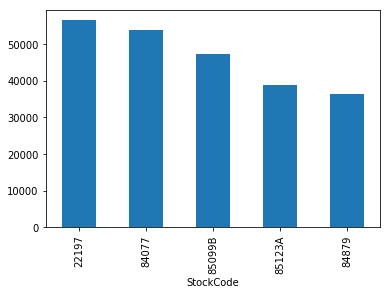

In [37]:
top_selling_product.plot.bar()

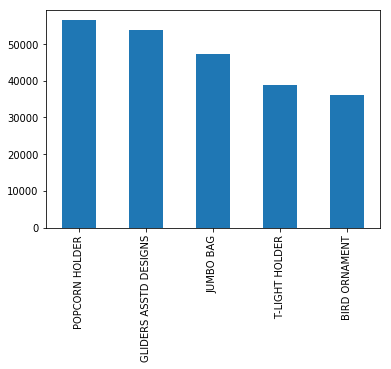

In [38]:
index = ['POPCORN HOLDER','GLIDERS ASSTD DESIGNS','JUMBO BAG','T-LIGHT HOLDER','BIRD ORNAMENT']
top_selling_product.index = index
top_selling_product.plot.bar()

### Stage 2 Questions
1. Relation between country-weekday & revenue (pivot_table)
2. Identify best week of based on the data (rolling (reading activity))
3. Find the richest person
4. What can you tell about spending capacity of the countries?

In [42]:
online_retail.pivot_table(index='Country' , columns='week_ofthe_day' , values='Total_Price' ,aggfunc='mean')

week_ofthe_day            Friday      Monday     Sunday    Thursday  \
Country                                                               
Australia              39.046078   22.611897  33.537115  134.363680   
Austria                22.221591   20.646250  15.860811   28.820926   
Bahrain                      NaN   47.510000        NaN   22.250000   
Belgium                21.348297   19.586068  17.206711   19.832042   
Brazil                 35.737500         NaN        NaN         NaN   
Canada                550.940000   17.566944        NaN   10.312000   
Channel Islands        28.650490   26.484824  40.222647   21.311176   
Cyprus                 11.551944   21.646552        NaN   24.871688   
Czech Republic         10.564000   36.617333        NaN         NaN   
Denmark               108.425000   25.282436        NaN   51.748162   
EIRE                   34.130478   28.281036  49.441058   30.411939   
European Community     -8.500000   45.000000  20.371053   23.337931   
Finland                45.609571   20.515833  55.323077   30.907227   
France                 26.371012   22.482162  22.948151   21.497028   
Germany                24.968907   20.399441  20.475621   26.842843   
Greece                 18.812264   53.201404        NaN         NaN   
Hong Kong              22.772600   39.996066        NaN         NaN   
Iceland                      NaN   27.538723        NaN   24.256429   
Israel                 16.173636   27.131429        NaN   31.841212   
Italy                  21.434124   20.951901  28.583333   20.727551   
Japan                  27.203269   43.160000  61.888939  235.918889   
Lebanon                      NaN         NaN        NaN   37.641778   
Lithuania                    NaN         NaN  47.001765         NaN   
Malta                        NaN   20.345455        NaN   28.493500   
Netherlands            94.887688  102.362882  95.463934  150.365174   
Norway                 30.485802   58.003333  26.191250   25.658819   
Poland                 21.771562   18.970000        NaN   18.209615   
Portugal               23.477011   21.439869  20.559714   12.104903   
RSA                          NaN         NaN        NaN   17.281207   
Saudi Arabia                 NaN         NaN        NaN   13.117000   
Singapore              31.226875   46.462588        NaN         NaN   
Spain                  26.893249   21.383057  16.603473   14.697523   
Sweden                 65.653398  145.257403  57.335730   54.169157   
Switzerland            32.302152   24.757041  32.933359   38.096481   
USA                    28.618571   17.990082        NaN  -24.541818   
United Arab Emirates         NaN   29.641333        NaN   26.658947   
United Kingdom         17.360051   15.607312  11.568784   18.436088   
Unspecified             6.621594   21.164792        NaN    8.423814   

week_ofthe_day           Tuesday     Wednesday  
Country                                         
Australia              97.557795  1.391560e+02  
Austria                23.609444  7.616727e+01  
Bahrain                      NaN -2.057400e+02  
Belgium                19.019247  1.934168e+01  
Brazil                       NaN           NaN  
Canada                       NaN  5.342400e+02  
Channel Islands        33.258741  2.059093e+01  
Cyprus                 18.715529  3.373425e+01  
Czech Republic               NaN           NaN  
Denmark                 2.474000  5.943929e+01  
EIRE                   33.237348  2.881900e+01  
European Community     17.400000           NaN  
Finland                31.181579  3.002962e+01  
France                 20.817889  2.375962e+01  
Germany                19.006789  2.463265e+01  
Greece                 18.916389           NaN  
Hong Kong              42.937477  3.962250e+01  
Iceland                24.466038  1.750525e+01  
Israel                  4.059706  3.064778e+01  
Italy                  21.971106  1.745000e+01  
Japan                 122.785789  1.115787e+02  
Lebanon                      NaN

In [39]:
online_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'week_ofthe_day', 'Total_Price'],
      dtype='object')

In [40]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in
    the pivot table will be stored in MultiIndex objects (hierarchical
    indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can 